In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt
import warnings
import cv2
warnings.filterwarnings('ignore')
sns.set(font_scale=2)

In [6]:
data = pd.read_csv('shpindex_regress.csv')
data = data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'D/A'])
data = data.replace([1, 2, 3], ['fire', 'harvest', 'infrastructure'])

In [3]:
def t_test(field, class1, class2, data):
    statistic, pvalue = stats.ttest_ind(data.loc[data['disturbance_type'] == class1][field], 
                                        data.loc[data['disturbance_type'] == class2][field], 
                                        equal_var=False)
    if pvalue < 0.05:
        cv2.putText(image, class1 + ' : ' + class2, (100, count), cv2.FONT_HERSHEY_COMPLEX, 
                    0.7,(0, 0, 0), 1)
        return count + 20

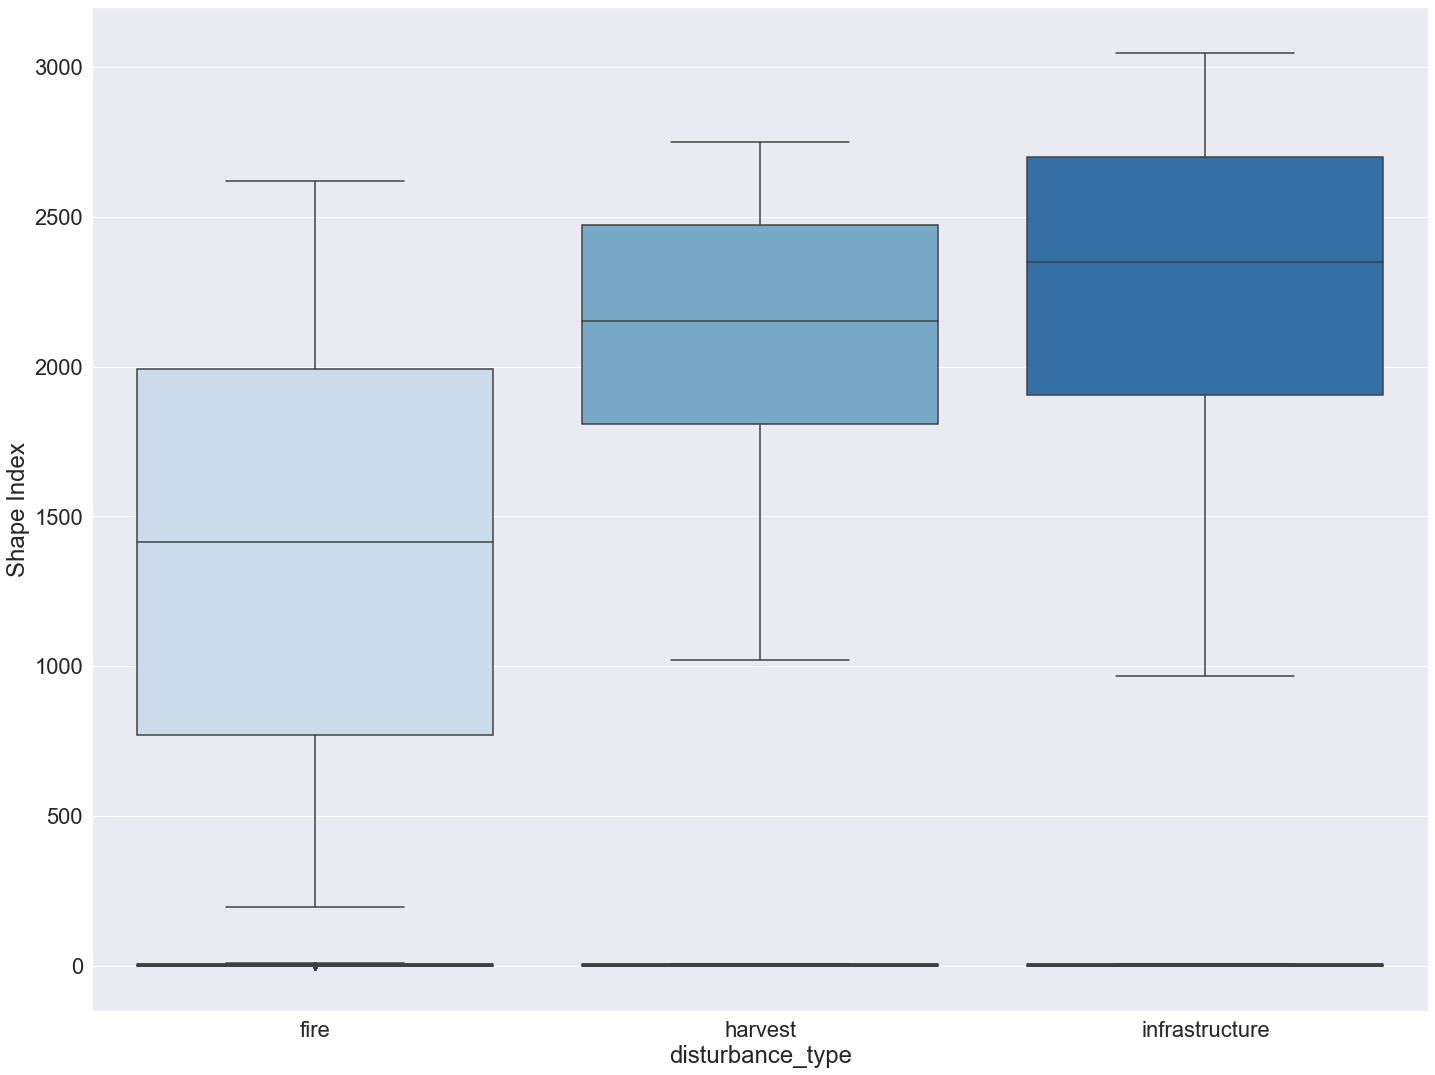

In [4]:
plt.figure(figsize=(20, 15))
location = 321
class1 = 'fire'
class2 = 'harvest'
class3 = 'infrastructure'
# d = {class1:{class1:' ', class2:' ', class3:' '}, 
#      class2:{class1:' ', class2:' ', class3:' '},
#      class3:{class1:' ', class2:' ', class3:' '}}
# table = pd.DataFrame(d)
for i in range(22, 28):
    # 去除离散值
    data1 = data.loc[data['label'] == 'fire']
    data2 = data.loc[data['label'] == 'harvest']
    data3 = data.loc[data['label'] == 'infrastructure']
    quantile1 = data1[data.keys()[i]].quantile(0.75)
    quantile2 = data2[data.keys()[i]].quantile(0.75)
    quantile3 = data3[data.keys()[i]].quantile(0.75)
    data1 = data1.loc[data1[data.keys()[i]] < quantile1]
    data2 = data2.loc[data2[data.keys()[i]] < quantile2]
    data3 = data3.loc[data3[data.keys()[i]] < quantile3]
    data_nor = pd.concat([data1, data2, data3]).rename(columns={'label': 'disturbance_type'})
    # 画图、显著性检验
    plt.tight_layout(pad=0.4, w_pad=4.0, h_pad=1.0)
#     plt.subplot(location + i - 22)
    path = 'D:\\yyx\\GEE\\data\\index_stats\\'
    path_input = path + data.keys()[i] + '.png'
    path_input = path_input.replace('/', ' divide ')
    sns.boxplot(x=data_nor["disturbance_type"], y=data_nor[data_nor.keys()[i]], palette="Blues")
    plt.savefig(path_input)
    image = cv2.imread(path_input)
    count = 100
    count = t_test(data.keys()[i], class1, class2, data_nor)
    count = t_test(data.keys()[i], class2, class3, data_nor)
    count = t_test(data.keys()[i], class3, class1, data_nor)
    path_output = path + data.keys()[i] + '_analysis.png'
    path_output = path_output.replace('/', ' divide ')
    cv2.imwrite(path_output, image)

In [12]:
data1 = data.loc[data['label'] == 'harvest']
data2 = data.loc[data['label'] == 'infrastructure']

Ttest_indResult(statistic=-0.09125930356210592, pvalue=0.9273735310529683)

In [17]:
for field in data.keys():
    statistic, pvalue = stats.ttest_ind(data1[str(field)], data2[str(field)], equal_var=False)
    field = field.replace('/', ' divide ')
    if pvalue < 0.05:
        print(field + ':1')
    else:
        print(field + ':0')

area:1
PT_NDVI_0:1
LT_mag:1
PT_NDVI_2:1
PT_NDVI_1:1
PT_NBR_0:1
PT_NBR_1:1
PT_NBR_2:1
PT_NBR_3:0
PT_NBR_4:0
PT_NBR_5:1
PT_NDVI_4:1
PT_NDVI_3:1
PT_NDMI_1:1
PT_NDMI_0:0
PT_NDVI_5:1
PT_NDMI_3:1
PT_NDMI_2:1
PT_NDMI_5:1
PT_NDMI_4:1


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [18]:
data.keys()

Index(['area', 'PT_NDVI_0', 'LT_mag', 'PT_NDVI_2', 'PT_NDVI_1', 'PT_NBR_0',
       'PT_NBR_1', 'PT_NBR_2', 'PT_NBR_3', 'PT_NBR_4', 'PT_NBR_5', 'PT_NDVI_4',
       'PT_NDVI_3', 'PT_NDMI_1', 'PT_NDMI_0', 'PT_NDVI_5', 'PT_NDMI_3',
       'PT_NDMI_2', 'PT_NDMI_5', 'PT_NDMI_4', 'label', 'Area', 'Perimeter',
       'P/A', 'P/sqrt(A)', 'Max.Distanc', 'D/sqrt(A)', 'Shape Index',
       'NDVI_slope', 'NDVI_intercept', 'NDVI_rvalue', 'NDVI_pvalue',
       'NDMI_slope', 'NDMI_intercept', 'NDMI_rvalue', 'NDMI_pvalue',
       'NBR_slope', 'NBR_intercept', 'NBR_rvalue', 'NBR_pvalue'],
      dtype='object')